https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_IVV

In [3]:
data_IVV.head(2)

,Adj Close
Date,
2009-06-01,77.035706
2009-06-08,77.466110


In [4]:
X = data_IVV.values
size = int(len(X) * 0.6)

In [5]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [6]:
#print(data)

In [7]:
#ts = data

In [8]:
train, test = X[0:size], X[size:len(X)]


In [9]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=195.252081, expected=193.431183
predicted=194.089717, expected=193.632721
predicted=194.226878, expected=194.951645
predicted=195.404027, expected=193.412872
predicted=194.123748, expected=192.107697
predicted=192.917225, expected=192.291885
predicted=193.019602, expected=196.887589
predicted=197.074571, expected=192.715515
predicted=193.652046, expected=195.027222
predicted=195.452995, expected=192.651062
predicted=193.533863, expected=193.986496
predicted=194.548188, expected=183.100449
predicted=185.247280, expected=184.638519
predicted=185.726959, expected=178.357422
predicted=179.806003, expected=182.280823
predicted=181.613422, expected=181.940033
predicted=182.805012, expected=178.532379
predicted=179.872824, expected=181.584244
predicted=182.147267, expected=187.539200
predicted=187.698514, expected=189.233994
predicted=189.718132, expected=193.244034
predicted=193.104537, expected=193.605240
predicted=194.089652, expected=195.633453
predicted=195.693100, expected=188

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=246.346590, expected=251.509750
predicted=252.420099, expected=257.756409
predicted=258.340860, expected=265.379150
predicted=265.542282, expected=264.814850
predicted=265.585495, expected=268.972687
predicted=269.187724, expected=269.398376
predicted=269.882268, expected=276.357819
predicted=276.013786, expected=278.001160
predicted=278.030534, expected=279.476196
predicted=279.489300, expected=273.427521
predicted=274.337299, expected=281.426422
predicted=280.821434, expected=278.337738
predicted=278.894852, expected=282.822845
predicted=282.503429, expected=288.676910
predicted=288.007933, expected=290.376465
predicted=290.070698, expected=290.217438
predicted=290.137486, expected=293.666229
predicted=293.168091, expected=294.202942
predicted=294.006261, expected=288.229645
predicted=288.911209, expected=286.142456
predicted=286.605708, expected=283.021637
predicted=283.761487, expected=275.607147


In [10]:
error_IVV = math.sqrt(mean_squared_error(test, predictions))
%store error_IVV
print('Test RMSE: %.3f' % error_IVV)

Stored 'error_IVV' (float)
Test RMSE: 4.481


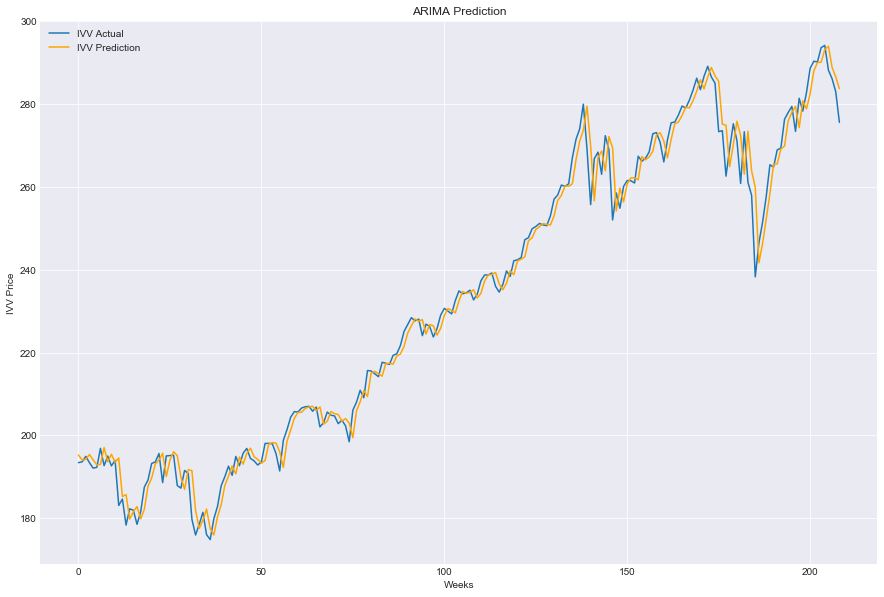

In [15]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'IVV Actual')
plt.plot(predictions, color='orange', label = 'IVV Prediction')
plt.xlabel('Weeks')
plt.ylabel('IVV Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [12]:
ARIMA_pred_IVV = pd.DataFrame(predictions) 
ARIMA_pred_IVV.columns = ['ARIMA_pred_IVV']
%store ARIMA_pred_IVV

Stored 'ARIMA_pred_IVV' (DataFrame)
